In [93]:
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
corpus_dir = "../data"
file_list = os.listdir(corpus_dir)

file_list.sort()

print(file_list)

['1612_pascha.txt', '1620_hierusalem.txt', '1625_palamedes.txt', '1637_gysbreght.txt', '1640_joseph in dotan.txt', '1640_joseph in egypte.txt', '1641_peter en pauwels.txt', '1645_maria stuart.txt', '1647_leeuwendalers.txt', '1648_salomon.txt', '1654_lucifer.txt', '1657_salmoneus.txt', '1660_david herstelt.txt', '1660_david in ballingschap.txt', '1660_samson.txt', '1661_adonias.txt', '1663_batavische gebroeders.txt', '1663_faeton.txt', '1664_adam.txt', '1667_noah.txt', '1667_zungchin.txt']


In [95]:
test_file = "../data/lucifer.txt"

In [96]:
god_counter = 0
god_count = []
word_count = []
catholic_score = []

for file_name in file_list:
    with open("../data/{}".format(file_name), "r") as file:
        text = file.read()
        text = nltk.tokenize.word_tokenize(text.lower())
        
        for word in text:
            if word == "god":
                god_counter += 1
    
    god_count.append(god_counter)
    word_count.append(len(text))
    catholic_score.append(god_counter / len(text))
        

In [97]:
year_list = []
play_list = []

for file in file_list:
    x = file.split("_")
    year_list.append(x[0])
    play_list.append(x[1].split(".")[0])

In [98]:
dic = {
    "Play": play_list,
    "Year": year_list,
    "Frequency of 'God'": god_count, 
    "Total words": word_count, 
    "Ratio": catholic_score
      }

In [99]:
data = pd.DataFrame.from_dict(dic)

data

,Play,Year,Frequency of 'God',Total words,Ratio
0,pascha,1612,0,17366,0.000000
1,hierusalem,1620,53,25254,0.002099
2,palamedes,1625,63,24636,0.002557
3,gysbreght,1637,125,27419,0.004559
4,joseph in dotan,1640,126,20699,0.006087
5,joseph in egypte,1640,126,18412,0.006843
6,peter en pauwels,1641,127,19362,0.006559
7,maria stuart,1645,127,20734,0.006125
8,leeuwendalers,1647,127,25034,0.005073
9,salomon,1648,128,21860,0.005855


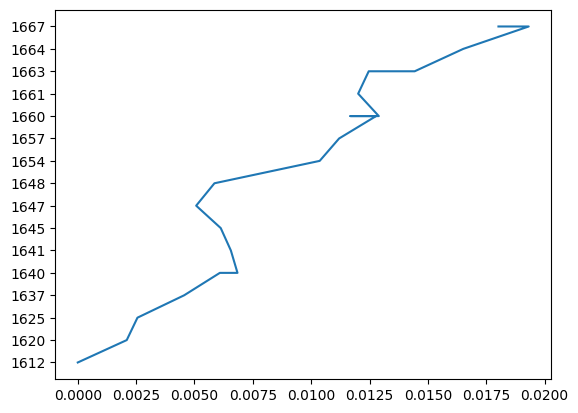

In [100]:
plt.plot(data["Ratio"], data["Year"])